<a href="https://colab.research.google.com/github/cristobalperezp/MDS7104-Machine-Learning/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Tarea 1 - Aprendizaje de Máquinas
<h2 align="center">  Alumno: Cristóbal Pérez
<h3 align="center"> MDS7104-1 - Aprendizaje de Máquinas
<h3 align="center"> Otoño 2023

---

## Configuración Inicial:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
seed = 20143826

In [3]:
! git clone 'https://github.com/cristobalperezp/MDS7104-Machine-Learning.git'

Cloning into 'MDS7104-Machine-Learning'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 11.58 MiB | 8.23 MiB/s, done.


In [4]:
data = pd.read_csv('/content/MDS7104-Machine-Learning/amazon_reviews_us_Gift_Card_v1_00.tsv.gz',sep='\t').sample(frac = 0.2, random_state = seed).reset_index(drop=True)

In [5]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18747468,R22VE1RZ6YR5AT,B00PMOT2IU,802996579,Amazon.com Gift Cards - Print at Home,Gift Card,5,0,0,N,Y,Five Stars,Easy and just what I needed.,2015-01-24
1,US,24320153,R3DGK3F4KO8O3P,B005EISPOG,307799435,Amazon Gift Card - Print - Baby Shower,Gift Card,5,0,0,N,Y,Loved the Baby Shower card.,I was very pleased w/ the simplicity of printi...,2014-04-29
2,US,25347410,R3UZ4B7GTFD5LA,B004RCNH8Y,644630034,Amazon Gift Card - Print - Congratulations!,Gift Card,5,0,0,N,Y,Practical and Pretty,I bought this ribbon to be used for various re...,2013-07-20
3,US,3488741,R26ZVOFFUD5JZE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Five Stars,god,2014-10-18
4,US,10049269,R4G4JDQSOSF7L,B00JDQK10G,255898874,Amazon.com Gift Card in a Birthday Cupcake Tin...,Gift Card,5,0,0,N,Y,Five Stars,Super cute. Got there in one day.,2015-02-21


In [6]:
data.shape

(29662, 15)

In [7]:
columns = ['star_rating','verified_purchase','total_votes','review_body']
df = data.copy()
df = df.loc[:,columns]
df.head()

,star_rating,verified_purchase,total_votes,review_body
0,5,Y,0,Easy and just what I needed.
1,5,Y,0,I was very pleased w/ the simplicity of printi...
2,5,Y,0,I bought this ribbon to be used for various re...
3,5,Y,0,god
4,5,Y,0,Super cute. Got there in one day.


In [8]:
df["review_body"].fillna("", inplace=True)
df['length_of_review'] = df['review_body'].str.split().apply(lambda x: len(x))
df = df.drop(columns=['review_body'])
df

,star_rating,verified_purchase,total_votes,length_of_review
0,5,Y,0,6
1,5,Y,0,32
2,5,Y,0,104
3,5,Y,0,1
4,5,Y,0,7
...,...,...,...,...
29657,5,Y,0,20
29658,5,Y,0,8
29659,5,Y,0,25
29660,5,N,0,24


In [9]:
# Pasar a numérica verified_purchase
df.loc[:,'verified_purchase'] = df.loc[:,'verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)
df

<ipython-input-9-3793ebb56061>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'verified_purchase'] = df.loc[:,'verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)


,star_rating,verified_purchase,total_votes,length_of_review
0,5,1,0,6
1,5,1,0,32
2,5,1,0,104
3,5,1,0,1
4,5,1,0,7
...,...,...,...,...
29657,5,1,0,20
29658,5,1,0,8
29659,5,1,0,25
29660,5,0,0,24


## Pregunta a)

Text(0.5, 1.0, 'Distribución de Clases para Star Rating')

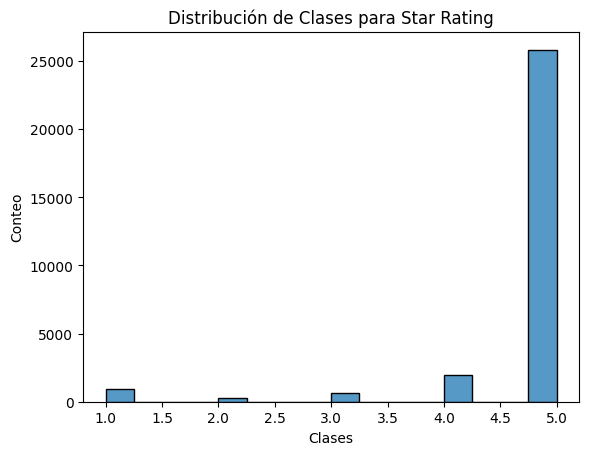

In [10]:
sns.histplot(df['star_rating'])
plt.xlabel("Clases")
plt.ylabel("Conteo")
plt.title("Distribución de Clases para Star Rating")

## Pregunta b)

In [11]:
df.columns

Index(['star_rating', 'verified_purchase', 'total_votes', 'length_of_review'], dtype='object')

In [12]:
regresores = ['verified_purchase', 'total_votes', 'length_of_review']
X = df.loc[:,regresores]
y = df.loc[:,'star_rating']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=seed)

Text(0.5, 1.0, 'Train: Distribución de Clases para Star Rating')

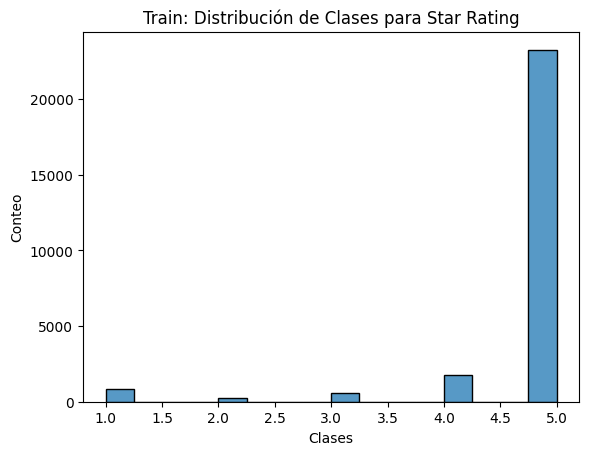

In [14]:
sns.histplot(y_train)
plt.xlabel("Clases")
plt.ylabel("Conteo")
plt.title("Train: Distribución de Clases para Star Rating")

Text(0.5, 1.0, 'Test: Distribución de Clases para Star Rating')

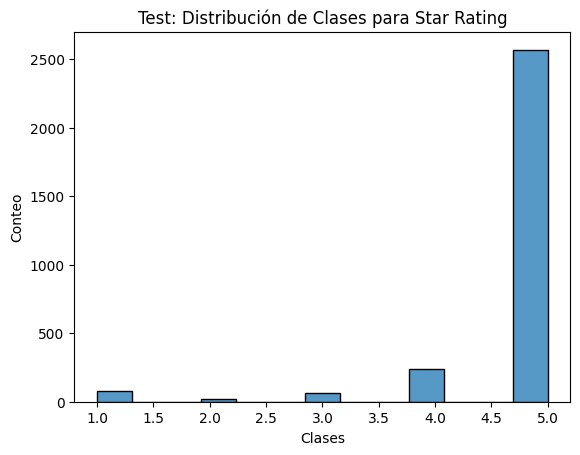

In [15]:
sns.histplot(y_test)
plt.xlabel("Clases")
plt.ylabel("Conteo")
plt.title("Test: Distribución de Clases para Star Rating")

In [16]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression().fit(X_train,y_train)

In [19]:
theta0 = lm.intercept_
theta1,theta2,theta3 = lm.coef_

In [20]:
print('theta_0 = ',theta0,' | intercept')
print('theta_1 = ',theta1,' | verified_purchase')
print('theta_2 = ',theta2,' | total_votes')
print('theta_3 = ',theta3,' | length_of_review')

theta_0 =  4.735268776924518  | intercept
theta_1 =  0.018096721161203987  | verified_purchase
theta_2 =  -0.07068684453242849  | total_votes
theta_3 =  -0.17693353664612393  | length_of_review


In [21]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
print('Train')
print('Mean Square Error: '+ str(mean_squared_error(y_train, y_pred_train)))
print()
print('Test')
print('Mean Square Error: '+ str(mean_squared_error(y_test, y_pred_test)))

Train
Mean Square Error: 0.637240107357175

Test
Mean Square Error: 0.5590396768812786


## Pregunta c)

In [24]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [25]:
lasso = []
ridge = []

norma_lasso = []
norma_ridge = []

n_rhos = 200
rhos = np.logspace(-3, 3, n_rhos)

for i in range(len(rhos)):
  lasso.append(
      Lasso(alpha = rhos[i]).fit(X_train,y_train)
  )
  ridge.append(
      Ridge(alpha = rhos[i]).fit(X_train,y_train)
  )

  norma_lasso.append(np.linalg.norm(lasso[i].coef_))
  norma_ridge.append(np.linalg.norm(ridge[i].coef_))

In [26]:
ecm_lasso_train = []
ecm_ridge_train = []

ecm_lasso_test = []
ecm_ridge_test = []

for i in range(len(rhos)):
  ecm_lasso_train.append(mean_squared_error(y_train, lasso[i].predict(X_train)) )
  ecm_ridge_train.append(mean_squared_error(y_train, ridge[i].predict(X_train)) )
  ecm_lasso_test.append(mean_squared_error(y_test, lasso[i].predict(X_test)) )
  ecm_ridge_test.append(mean_squared_error(y_test, ridge[i].predict(X_test)) )

In [27]:
print('min ECM test LASSO:',min(ecm_lasso_test))
print('min ECM test Ridge:',min(ecm_ridge_test))

min ECM test LASSO: 0.5517279302582414
min ECM test Ridge: 0.5579849740760969


In [28]:
# Utilice distintos valores para rho y grafique el ECM en función de éste para ambos datasets

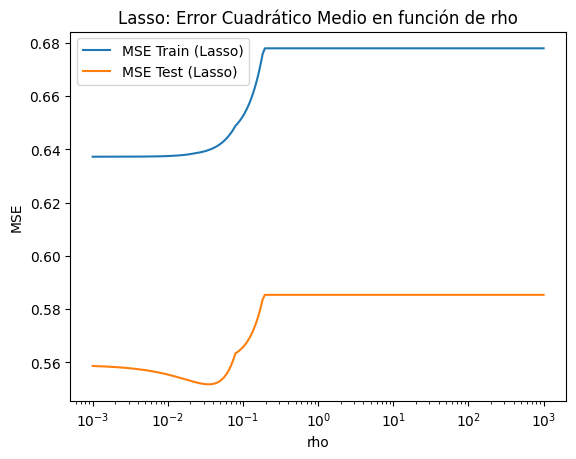

In [29]:
ax = plt.gca()

ax.plot(rhos, ecm_lasso_train,label='MSE Train (Lasso)')
ax.plot(rhos, ecm_lasso_test,label='MSE Test (Lasso)')
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())
plt.xlabel("rho")
plt.ylabel("MSE")
plt.title("Lasso: Error Cuadrático Medio en función de rho")
plt.axis("tight")
plt.legend()
plt.show()

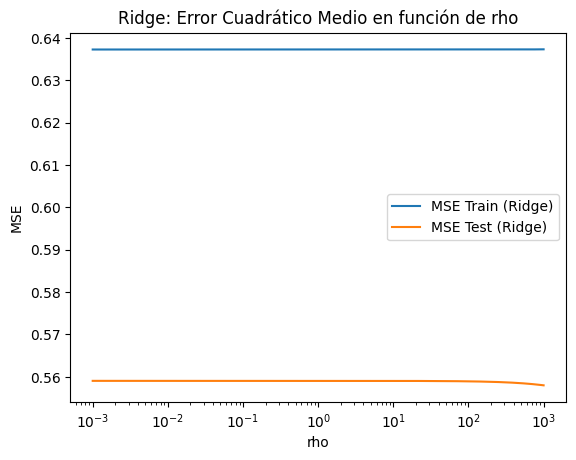

In [30]:
ax = plt.gca()

ax.plot(rhos, ecm_ridge_train,label='MSE Train (Ridge)')
ax.plot(rhos, ecm_ridge_test,label='MSE Test (Ridge)')
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())
plt.xlabel("rho")
plt.ylabel("MSE")
plt.title("Ridge: Error Cuadrático Medio en función de rho")
plt.legend()
plt.axis("tight")
plt.show()

In [31]:
# Grafique la norma de los parámetros encontrados en para los distintos modelos e indique qué puede observar de las magnitudes obtenidas para cada método.

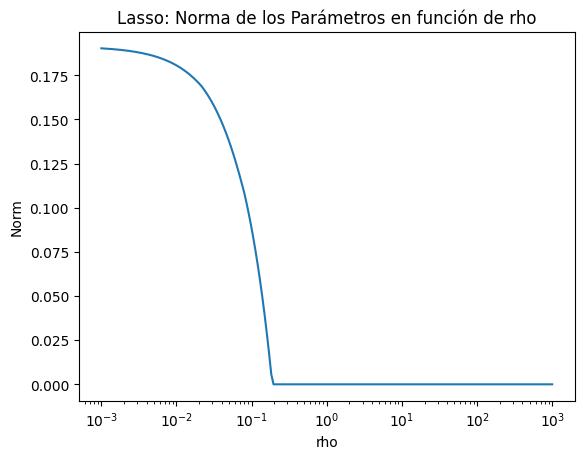

In [32]:
ax = plt.gca()

ax.plot(rhos, norma_lasso)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())
plt.xlabel("rho")
plt.ylabel("Norm")
plt.title("Lasso: Norma de los Parámetros en función de rho")
plt.axis("tight")
plt.show()

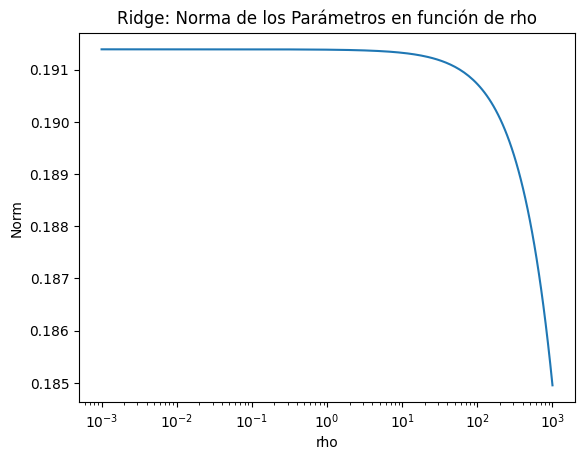

In [33]:
ax = plt.gca()

ax.plot(rhos, norma_ridge)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim())
plt.xlabel("rho")
plt.ylabel("Norm")
plt.title("Ridge: Norma de los Parámetros en función de rho")
plt.axis("tight")
plt.show()

Conclusión

## Pregunta d)

Si tenemos 3 variables con $X = [verified\ purchase,\ total\ votes,\ length\ of\ review]$, aplicar (a $X$):

```
PokynomialFeatures(2,include_bias=False)
```
Generará:
$$[verified\ purchase,\ total\ votes,\ length\ of\ review,\ (verified\ purchase)^2, (total\ votes)^2,\ (length\ of\ review)^2,\ verified\ purchase*total\ votes,\ verified\ purchase*length\ of\ review,\ total\ votes*length\ of\ review]$$


In [34]:
# Importamos librería para trabajar con features polinomiales
from sklearn.preprocessing import PolynomialFeatures

# Definimos el grado del polinomio a usar
poly_grade = 2

# Armamos features polinomiales con los datos escalados
X_poly_train = PolynomialFeatures(poly_grade,include_bias=False).fit_transform(X_train)

# Definimos el clasificador y clasificamos los datos
lm_poly = LinearRegression().fit(X_poly_train, y_train)

In [35]:
X_poly_test = PolynomialFeatures(poly_grade,include_bias=False).fit_transform(X_test)

In [36]:
#  Implemente dicho modelo y reporte su ECM en los conjuntos de entrenamiento y prueba.
print('Train')
print('Mean Square Error: '+ str(mean_squared_error(y_train, lm_poly.predict(X_poly_train))))
print()
print('Test')
print('Mean Square Error: '+ str(mean_squared_error(y_test, lm_poly.predict(X_poly_test))))

Train
Mean Square Error: 0.6236274353397395

Test
Mean Square Error: 0.665288288655899


## Pregunta e)

## Pregunta f)

In [37]:
def softmax_(z):
  """
    Función softmax para calcular la probabilidad de cada clase.
    
    Parameters:
    ----------
    z : array-like, shape (n_samples, n_classes)
      Matriz de entrada con las puntuaciones de cada clase.
    
    Returns:
    --------
    softmax : array, shape (n_samples, n_classes)
      Matriz con las probabilidades normalizadas de cada clase.
  """
  softmax = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True) 
  return softmax

class MultipleLogRegression:
  """
    Clase para implementar regresión logística múltiple.
    
    Parameters:
    -----------
    params : dict
      Diccionario con learning_rate y epochs
    
    Attributes:
    ----------
    coef_ : array, shape (n_features, n_classes)
      Coeficientes de la regresión logística para cada clase.
    intercept_ : array, shape (n_classes,)
      Término de intercepción de la regresión logística para cada clase.
  """
  def __init__(self, params = None):
    """
      Constructor de la clase.
    """
    self.coef_ = None
    self.intercept_ = None
    if params == None:
      self.learning_rate = 0.01
      self.epochs = 1000
    else:
      self.learning_rate = params['learning_rate']
      self.epochs = params['epochs']


  def gradient(self,n,ti,oi,xi):
    """
      Método para calcular el gradiente.
        
      Parameters:
      -----------
      n : int
        Número de muestras de entrenamiento.
      ti : array-like, shape (n_samples, n_classes)
        Matriz de one-hot encoding de las etiquetas verdaderas.
      oi : array-like, shape (n_samples, n_classes)
        Matriz de probabilidades predichas por la regresión logística.
      xi : array-like, shape (n_samples, n_features)
        Matriz de características de entrenamiento.
        
      Returns:
      --------
      gradient : array, shape (n_features, n_classes)
        Gradiente del costo respecto a los coeficientes de la regresión logística.
    """
    gradient = np.dot(xi.T, (oi - ti)) / n
    return gradient

  def one_hot(self,y):
    """
      Método para codificar las etiquetas en one-hot encoding.
        
      Parameters:
      -----------
      y : array-like, shape (n_samples,)
        Etiquetas de entrenamiento.
        
      Returns:
      --------
      encoding : array, shape (n_samples, n_classes)
        Matriz de one-hot encoding de las etiquetas.
    """
    n_classes = np.max(y)
    encoding = np.zeros((len(y), n_classes))
    # One-hot encoding
    encoding[np.arange(len(y)), y-1] = 1
    return encoding

  def fit(self,X,y):
    """
      Método para ajustar el modelo a los datos de entrenamiento.
        
      Parameters:
      -----------
      X : array-like, shape (n_samples, n_features)
        Matriz de características de entrenamiento.
      y : array-like, shape (n_samples,)
        Etiquetas de entrenamiento.

      Returns:
      --------
      None
        Modelo entrernado.
    """
    n_samples, n_features = X.shape
    n_classes = np.max(y)

    # Codificar las etiquetas en one-hot encoding
    Ti = self.one_hot(y)

    # Inicializar los coeficientes con ceros
    self.coef_ = np.zeros((n_features, n_classes))
    self.intercept_ = np.zeros(n_classes)
    
    # SGD
    for _ in range(self.epochs):
      z = np.dot(X, self.coef_) + self.intercept_
      Oi = softmax_(z)
      gradient = self.gradient(n_samples, Ti, Oi, X)
      self.coef_ -= self.learning_rate * gradient
      self.intercept_ -= self.learning_rate * np.mean( Oi - Ti , axis = 0)

  def predict(self,X):
    """
      Método para predecir las etiquetas de clases en nuevos datos.
        
      Parameters:
      -----------
      X : array-like, shape (n_samples, n_features)
        Matriz de características de los datos de prueba.
        
      Returns:
      --------
      y_pred : array, shape (n_samples,)
        Etiquetas predichas para los datos de prueba.
    """
    z = np.dot(X, self.coef_) + self.intercept_
    Oi = softmax_(z)
    # Obtener el argmax (sumar 1 para volver a la codificación original)
    y_pred = np.argmax(Oi, axis=1) + 1
    return y_pred

In [38]:
lr = MultipleLogRegression()
lr.fit(X_train,y_train)

In [39]:
print(lr.coef_.T)
print(lr.intercept_)

[[-0.0465938   0.06321161  0.13451871]
 [ 0.00061491  0.02977484  0.03605459]
 [ 0.00381157  0.00830503  0.04823377]
 [ 0.01841875 -0.01629258  0.00232168]
 [ 0.02374856 -0.0849989  -0.22112876]]
[-0.5883118  -0.73759044 -0.66022987 -0.33188108  2.31801319]


In [40]:
#  Implemente dicho modelo y reporte su ECM en los conjuntos de entrenamiento y prueba.
print('Train')
print('Mean Square Error: '+ str(mean_squared_error(y_train, lr.predict(X_train))))
print()
print('Test')
print('Mean Square Error: '+ str(mean_squared_error(y_test, lr.predict(X_test))))

Train
Mean Square Error: 0.7501404757445215

Test
Mean Square Error: 0.6359959555106168


In [41]:
# Regresión Logística de Sklearn para comparar
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression().fit(X_train,y_train)

In [42]:
print(logit.coef_)
print()
print(logit.intercept_)

[[-0.10403324  0.08793673  0.18727284]
 [-0.02226514  0.08316521  0.19858726]
 [ 0.03325005  0.03091927  0.1266456 ]
 [ 0.0584025  -0.10658091 -0.14209759]
 [ 0.03464582 -0.09544031 -0.37040811]]

[-0.59339617 -1.69088886 -0.92709768  0.31076709  2.90061563]


In [43]:
print('Train')
print('Mean Square Error: '+ str(mean_squared_error(y_train, logit.predict(X_train))))
print()
print('Test')
print('Mean Square Error: '+ str(mean_squared_error(y_test, logit.predict(X_test))))

Train
Mean Square Error: 0.7576325154523319

Test
Mean Square Error: 0.6386922817660937


## Pregunta g)

In [44]:
# calculamos accuracy para la regresión lineal y regresión logística
from sklearn.metrics import accuracy_score

In [45]:
print('Train')
print('Accuracy: '+ str(accuracy_score(y_train, np.round(y_pred_train))))
print()
print('Test')
print('Accuracy: '+ str(accuracy_score(y_test, np.round(y_pred_test))))

Train
Accuracy: 0.8302678404195543

Test
Accuracy: 0.8254128749578699


In [46]:
print('Train')
print('Accuracy: '+ str(accuracy_score(y_train, lr.predict(X_train))))
print()
print('Test')
print('Accuracy: '+ str(accuracy_score(y_test, lr.predict(X_test))))

Train
Accuracy: 0.8714740588125117

Test
Accuracy: 0.8661948095719582
